# load data, import stuff

In [26]:
# importing packages
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [27]:
# load data
xls = pd.ExcelFile("Mouse_Data_Student_Copy.xlsx")

# all the sheets
fem_temp = xls.parse('Fem Temp')
fem_act = xls.parse('Fem Act')
male_temp = xls.parse('Male Temp')
male_act = xls.parse('Male Act')

# full dataset
temp_all = pd.concat([fem_temp, male_temp], axis=1)
act_all = pd.concat([fem_act, male_act], axis=1)



In [28]:
temp_all

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,37.11,37.91,36.85,38.20,37.54,37.04,37.41,36.35,37.47,37.99,...,36.48,37.10,36.16,36.85,36.08,36.86,36.68,36.41,36.93,37.00
1,37.13,37.98,36.78,38.19,37.55,37.06,37.46,36.41,37.53,37.99,...,36.44,37.10,36.05,36.91,36.11,36.84,36.71,36.38,36.83,37.06
2,37.19,37.98,36.76,38.14,37.55,37.09,37.56,36.50,37.53,37.96,...,36.37,37.23,35.95,36.93,36.12,36.89,36.72,36.33,36.76,37.06
3,37.20,37.96,36.72,37.95,37.54,37.11,37.74,36.55,37.46,37.93,...,36.27,37.33,35.80,37.00,36.10,36.84,36.69,36.27,36.72,37.01
4,37.22,37.95,36.64,37.80,37.53,37.09,37.73,36.63,37.51,37.87,...,36.63,37.36,35.80,37.06,36.18,36.84,36.62,36.22,36.67,36.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,36.93,37.16,36.45,37.05,37.59,37.38,37.54,36.92,36.64,37.33,...,37.00,37.38,37.00,35.96,37.00,36.38,37.02,35.78,36.68,37.00
20156,37.00,37.00,36.46,36.99,37.62,37.38,37.53,36.85,36.63,37.37,...,37.00,37.14,37.00,35.90,37.00,36.44,37.06,35.78,36.91,37.00
20157,37.08,37.10,36.48,36.96,37.67,37.40,37.47,36.85,36.65,37.33,...,37.00,37.21,37.00,35.84,37.00,36.42,37.09,35.82,37.05,37.00
20158,37.10,37.26,36.51,36.95,37.63,37.46,37.49,36.86,36.85,37.22,...,37.00,37.35,37.00,35.80,37.00,36.49,37.09,35.77,37.19,37.00


# Graph 1: Avg Activity vs. Avg Body Temp
### **“Do mice that run hotter also tend to be more active?”**

In [29]:
# cleanup

avg_temp = temp_all.mean()
avg_act = act_all.mean()

mouse_df = pd.DataFrame({
    'avg_temp': avg_temp,
    'avg_act': avg_act,
    'sex': ['Female' if col.startswith('f') else 'Male' for col in avg_temp.index]
})

mouse_df

,avg_temp,avg_act,sex
f1,37.387025,16.146920,Female
f2,37.334791,26.622362,Female
f3,37.047750,15.545874,Female
f4,37.341597,21.012977,Female
f5,37.762108,25.912074,Female
f6,37.293813,26.802580,Female
f7,37.399490,18.571997,Female
f8,37.341488,27.611967,Female
f9,37.016054,29.631879,Female
f10,37.006643,21.705183,Female


In [31]:
mouse_df

,avg_temp,avg_act,sex
f1,37.387025,16.146920,Female
f2,37.334791,26.622362,Female
f3,37.047750,15.545874,Female
f4,37.341597,21.012977,Female
f5,37.762108,25.912074,Female
f6,37.293813,26.802580,Female
f7,37.399490,18.571997,Female
f8,37.341488,27.611967,Female
f9,37.016054,29.631879,Female
f10,37.006643,21.705183,Female


In [30]:
plt.figure(figsize=(10, 6))

for _, row in mouse_df.iterrows():
    plt.scatter(row['avg_temp'], row['avg_act'],
                color=row['color'],
                s=80, linewidth=2)

    plt.text(row['avg_temp'], row['avg_act'] + 0.4, row['mouse_id'],
             fontsize=7, ha='center')

plt.title("Average Temp vs. Average Activity Level For Each Mouse")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Average Activity Level")
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'color'

<Figure size 1000x600 with 0 Axes>

## Graph 2: Mouse Consistency Profile

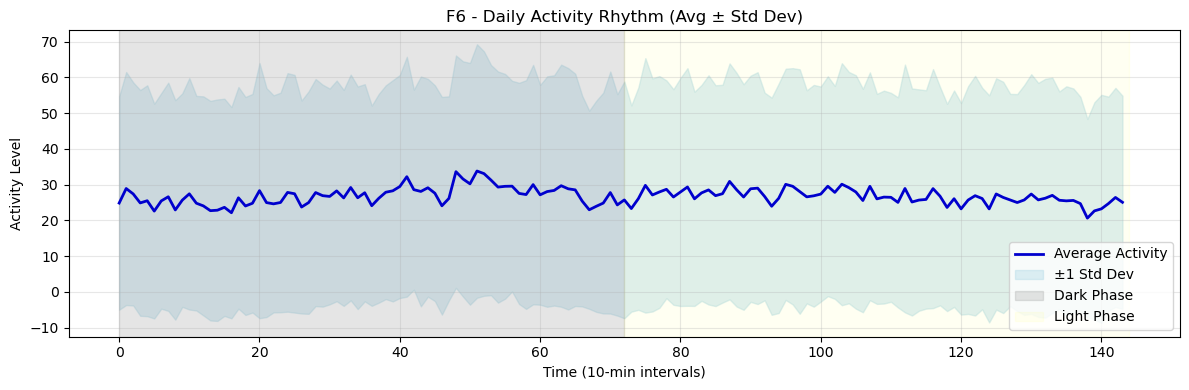

In [32]:
# Choose a mouse ID
mouse_id = 'f6'
mouse_series = act_all[mouse_id]

# Reshape into matrix: rows = days, columns = 144 time steps (10-min intervals)
n_days = len(mouse_series) // 144
activity_matrix = mouse_series.iloc[:n_days * 144].values.reshape(n_days, 144)

# Compute average and standard deviation across days for each time interval
avg_profile = activity_matrix.mean(axis=0)
std_profile = activity_matrix.std(axis=0)

# Plot
plt.figure(figsize=(12, 4))

# Plot average
plt.plot(avg_profile, label='Average Activity', color='mediumblue', linewidth=2)

# Plot ±1 std dev band
plt.fill_between(np.arange(144),
                 avg_profile - std_profile,
                 avg_profile + std_profile,
                 color='lightblue', alpha=0.4,
                 label='±1 Std Dev')

# Add circadian light/dark phase overlay
plt.axvspan(0, 72, color='gray', alpha=0.2, label='Dark Phase')
plt.axvspan(72, 144, color='yellow', alpha=0.05, label='Light Phase')

# Format and display
plt.title(f"{mouse_id.upper()} - Daily Activity Rhythm (Avg ± Std Dev)")
plt.xlabel("Time (10-min intervals)")
plt.ylabel("Activity Level")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Graph 3: Estrus vs. Baseline Activity Difference (Female Only)

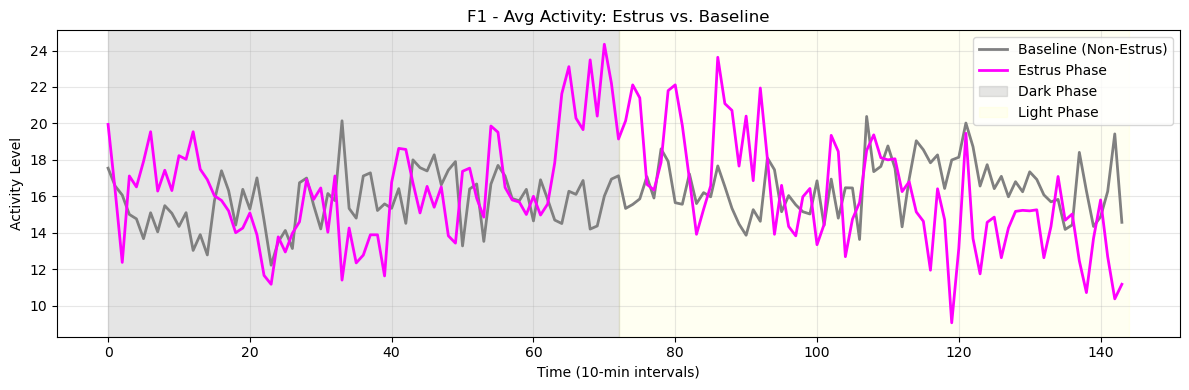

In [33]:
mouse_id = 'f1'
series = fem_act[mouse_id]

# Total time steps and estrus logic: 4-day cycle, estrus starts at step 288, lasts 1 day (144 steps)
total_steps = len(series)
estrus_mask = np.zeros(total_steps, dtype=bool)
for start in range(288, total_steps, 576):
    estrus_mask[start:start+144] = True

# Trim to full days (144 steps per day)
n_days = total_steps // 144
series = series.iloc[:n_days * 144]
estrus_mask = estrus_mask[:n_days * 144]

# Reshape into (days, 144)
data_matrix = series.values.reshape(n_days, 144)
estrus_mask_matrix = estrus_mask.reshape(n_days, 144)

# Identify time steps that are in estrus vs. not
estrus_rows = data_matrix[estrus_mask_matrix].reshape(-1, 144)
baseline_rows = data_matrix[~estrus_mask_matrix].reshape(-1, 144)

# Compute averages
estrus_avg = estrus_rows.mean(axis=0)
baseline_avg = baseline_rows.mean(axis=0)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(baseline_avg, label="Baseline (Non-Estrus)", color='gray', linewidth=2)
plt.plot(estrus_avg, label="Estrus Phase", color='magenta', linewidth=2)

# Optional: light/dark cycle overlay (72 = 12h)
plt.axvspan(0, 72, color='gray', alpha=0.2, label='Dark Phase')
plt.axvspan(72, 144, color='yellow', alpha=0.05, label='Light Phase')

# Format
plt.title(f"{mouse_id.upper()} - Avg Activity: Estrus vs. Baseline")
plt.xlabel("Time (10-min intervals)")
plt.ylabel("Activity Level")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

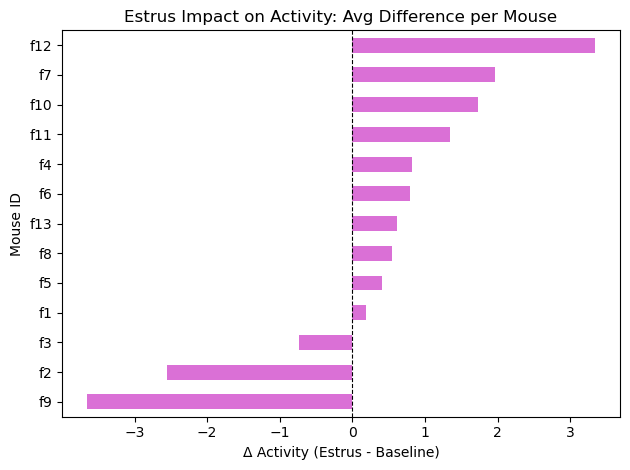

In [34]:
# Step 1: Create estrus mask
# Assumes 4-day cycle, estrus starts at step 288, lasts 144 steps (1 day)
total_steps = len(fem_act)
estrus_mask = np.zeros(total_steps, dtype=bool)
for start in range(288, total_steps, 576):
    estrus_mask[start:start+144] = True

# Step 2: Trim to full days
n_days = total_steps // 144
estrus_mask = estrus_mask[:n_days * 144]

# Step 3: Calculate difference in avg activity for each mouse
estrus_diff = {}

for mouse in fem_act.columns:
    series = fem_act[mouse].iloc[:n_days * 144]
    estrus_vals = series[estrus_mask]
    baseline_vals = series[~estrus_mask]
    estrus_avg = estrus_vals.mean()
    baseline_avg = baseline_vals.mean()
    estrus_diff[mouse] = estrus_avg - baseline_avg  # delta = estrus - baseline

# Step 4: Create DataFrame
diff_df = pd.DataFrame.from_dict(estrus_diff, orient='index', columns=['Estrus vs. Baseline'])

# Step 5: Plot horizontal bar chart
plt.figure(figsize=(10, 5))
diff_df.sort_values(by='Estrus vs. Baseline').plot(kind='barh', legend=False, color='orchid')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Estrus Impact on Activity: Avg Difference per Mouse")
plt.xlabel("Δ Activity (Estrus - Baseline)")
plt.ylabel("Mouse ID")
plt.tight_layout()
plt.show()

# Graph 4: Activity Heatmap (Mouse x Time of Day)

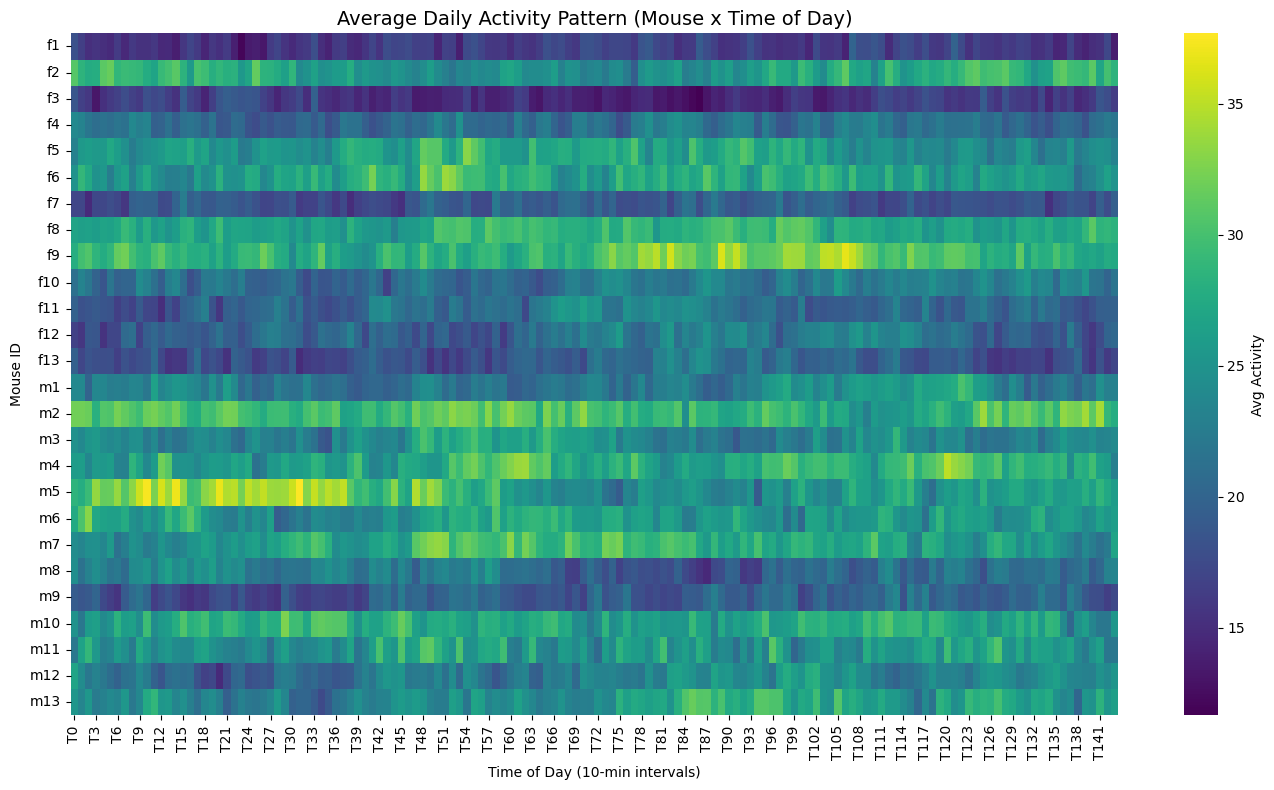

In [35]:
# Trim to full days only (144 steps per day)
n_days = len(act_all) // 144
all_act_trimmed = act_all.iloc[:n_days * 144]

# Reshape to (n_days, 144, n_mice)
reshaped = all_act_trimmed.values.reshape(n_days, 144, len(act_all.columns))

# Compute average activity per timepoint for each mouse
# Resulting shape = (n_mice, 144)
mean_daily_profiles = reshaped.mean(axis=0).T

# Create DataFrame for heatmap
heatmap_df = pd.DataFrame(mean_daily_profiles,
                          index=act_all.columns,
                          columns=[f"T{i}" for i in range(144)])

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_df, cmap='viridis', cbar_kws={'label': 'Avg Activity'})
plt.title("Average Daily Activity Pattern (Mouse x Time of Day)", fontsize=14)
plt.xlabel("Time of Day (10-min intervals)")
plt.ylabel("Mouse ID")
plt.tight_layout()
plt.show()

# Graph 5: Estrus Cycle Overlay (females only)
### **“Do some mice behave differently during their estrus cycle?”**

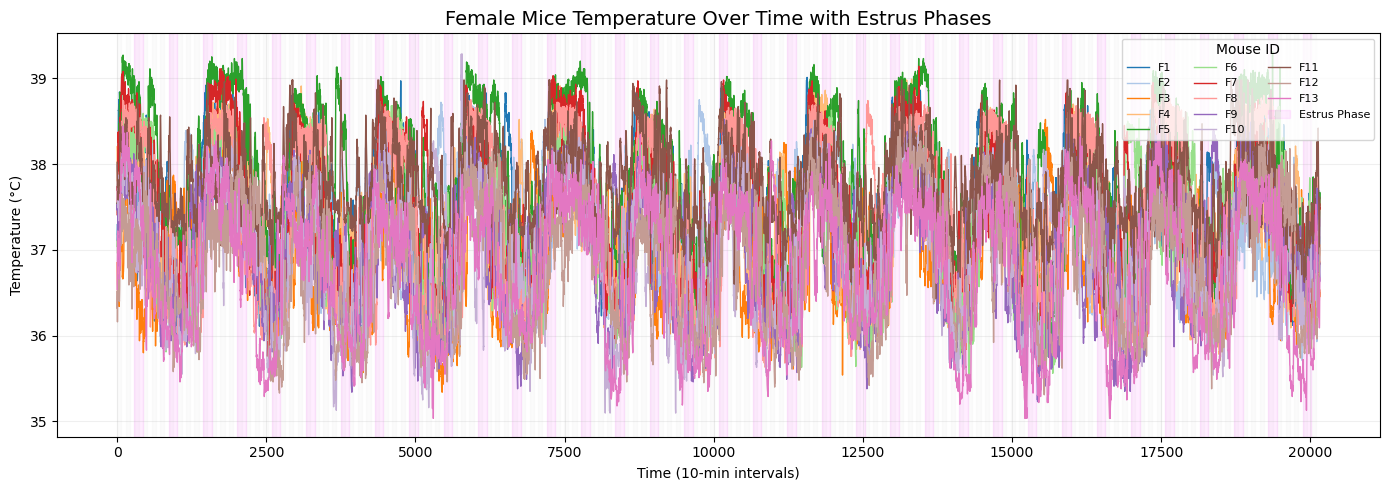

In [36]:
plt.figure(figsize=(14, 5))
palette = sns.color_palette("tab20", n_colors=len(fem_temp.columns))
time = np.arange(len(fem_temp))  # time index = rows

# Plot each mouse's temperature
for i, mouse in enumerate(fem_temp.columns):
    plt.plot(time, fem_temp[mouse], label=mouse.upper(), color=palette[i], linewidth=1)

# Highlight estrus cycle: every 576 rows, estrus starts at 288 and lasts 144 steps
for start in range(288, len(fem_temp), 576):
    plt.axvspan(start, start + 144, color='magenta', alpha=0.07, label='Estrus Phase' if start == 288 else None)

# Optional: light/dark cycle (12h each = 72 steps)
for day_start in range(0, len(fem_temp), 144):
    plt.axvspan(day_start, day_start + 72, color='gray', alpha=0.03)

# Labels and legend
plt.title("Female Mice Temperature Over Time with Estrus Phases", fontsize=14)
plt.xlabel("Time (10-min intervals)")
plt.ylabel("Temperature (°C)")
plt.legend(ncol=3, fontsize=8, title="Mouse ID", loc='upper right')
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

# Graph 6: Clustered Behavior Types

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

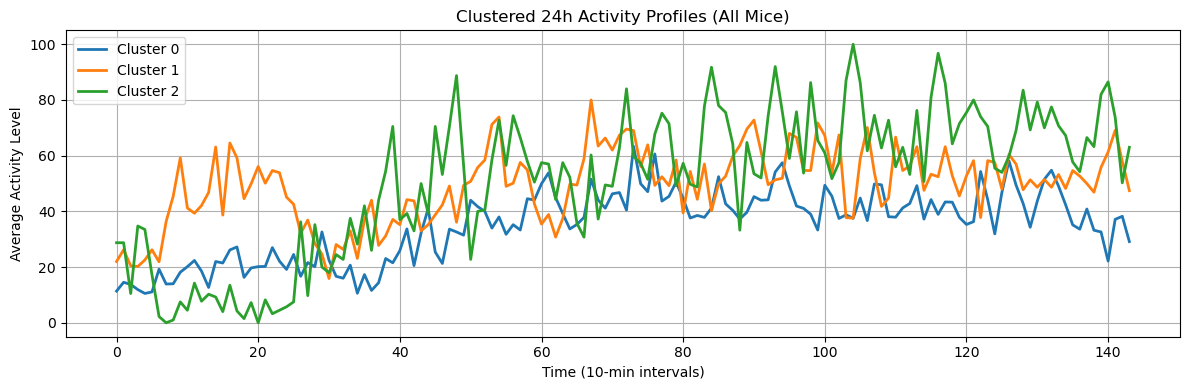

In [38]:
# Step 1: Take first 144 rows (24h) of activity data from both sexes
fem_24h = fem_act.iloc[:144].T
male_24h = male_act.iloc[:144].T

# Step 2: Label each mouse
fem_24h['sex'] = 'Female'
male_24h['sex'] = 'Male'

# Step 3: Combine datasets
activity_24h = pd.concat([fem_24h, male_24h])
activity_only = activity_24h.drop(columns=['sex'])

# Step 4: Normalize across timepoints
scaler = StandardScaler()
X_scaled = scaler.fit_transform(activity_only)

# Step 5: Run KMeans clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Step 6: Store results
activity_24h['cluster'] = clusters
activity_24h['mouse'] = activity_24h.index

# Step 7: Plot average 24h profiles for each cluster
plt.figure(figsize=(12, 4))
for cluster_id in range(k):
    members = activity_24h[activity_24h['cluster'] == cluster_id].drop(columns=['cluster', 'mouse', 'sex'])
    mean_profile = members.mean(axis=0)
    plt.plot(mean_profile.values, label=f'Cluster {cluster_id}', linewidth=2)

plt.title("Clustered 24h Activity Profiles (All Mice)")
plt.xlabel("Time (10-min intervals)")
plt.ylabel("Average Activity Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Why Cluster Mouse Behavior?**

- We clustered mice based on their 24-hour activity profiles to uncover distinct patterns in their circadian rhythms. Rather than rely on just average values (like mean activity or temperature), clustering allows us to group mice by how their behavior unfolds over time — identifying types like "night owls," "steady movers," or "burst-driven."

- This approach reflects how people often describe themselves by daily rhythm ("I'm a morning person," "I'm most productive at night"), and lets us match users to real mice with similar energy curves.



**What Question Does This Answer?**

- “Which mice behave similarly throughout the day?”

- “What kind of rhythm type am I most similar to?”

- By visualizing clusters of activity rhythms, we give users a sense of where they “fit” — whether they align with mice that spike early, late, or stay active throughout.



**Why k=3?**

- We chose k=3 to represent a balance between granularity and interpretability:

- Cluster 0: High night activity --> “Night Owl”

- Cluster 1: Consistent activity --> “Steady Cruiser”

- Cluster 2: Sporadic bursts --> “Chaotic Sprinter”

This number was selected empirically, after testing a few cluster sizes and evaluating the clarity of the average activity profiles. Three gave us enough diversity to form clear, relatable types without overfitting or making the story too complex.



In [39]:
# Group mice by cluster and list them
cluster_members = activity_24h.groupby('cluster')['mouse'].apply(list)

# Print mice in each cluster
for cluster_id, mice in cluster_members.items():
    print(f"\nCluster {cluster_id} has {len(mice)} mice:")
    for mouse in mice:
        print(f" - {mouse}")


Cluster 0 has 13 mice:
 - f1
 - f3
 - f6
 - f11
 - f12
 - f13
 - m1
 - m2
 - m3
 - m8
 - m9
 - m10
 - m11

Cluster 1 has 9 mice:
 - f2
 - f4
 - f7
 - f8
 - f10
 - m5
 - m6
 - m7
 - m13

Cluster 2 has 4 mice:
 - f5
 - f9
 - m4
 - m12
